In [7]:
# Public High Resolution SAR Image (https://registry.opendata.aws/umbra-open-data/)
url = 'http://umbra-open-data-catalog.s3.amazonaws.com/sar-data/tasks/ad%20hoc/82bcfaf1-31d1-4553-bb68-d44e4d0445fc/2025-03-24-19-23-11_UMBRA-08/2025-03-24-19-23-11_UMBRA-08_GEC.tif'
import rasterio 
import rioxarray 
import rasterio

In [25]:
# NOTE: by default the rotation is not applied
# but coordinate centers are read as lon,lat... hmmm
da = rioxarray.open_rasterio(url, 
                             masked=True,
                             overview_level=2 # Set to -1 for full-res data
                            ).squeeze()
da.rio.transform()

Affine(1.4683847708467612e-05, 1.808915414199165e-05, -122.35190870273843,
       1.2221915036342531e-05, -9.921125565483879e-06, 47.6520329343832)

In [31]:
da

<xarray.DataArray (y: 2857, x: 2857)> Size: 33MB
array([[ 2.,  4., 13., ..., 10., 13.,  5.],
       [ 3., 10., 25., ..., 11., 16.,  6.],
       [ 4.,  6., 15., ...,  6.,  7.,  9.],
       ...,
       [ 8.,  4.,  6., ...,  5.,  4.,  8.],
       [ 4.,  5.,  5., ...,  3.,  5.,  4.],
       [ 7.,  7.,  4., ...,  4.,  2.,  5.]], dtype=float32)
Coordinates:
    band         int64 8B 1
    xc           (y, x) float64 65MB -122.4 -122.4 -122.4 ... -122.3 -122.3
    yc           (y, x) float64 65MB 47.65 47.65 47.65 ... 47.66 47.66 47.66
    spatial_ref  int64 8B 0
Dimensions without coordinates: y, x
Attributes:
    COLLECT_ID:     0b3ddf39-d213-4c6d-9405-6525db92461a
    PROCESSOR:      4.10.0
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

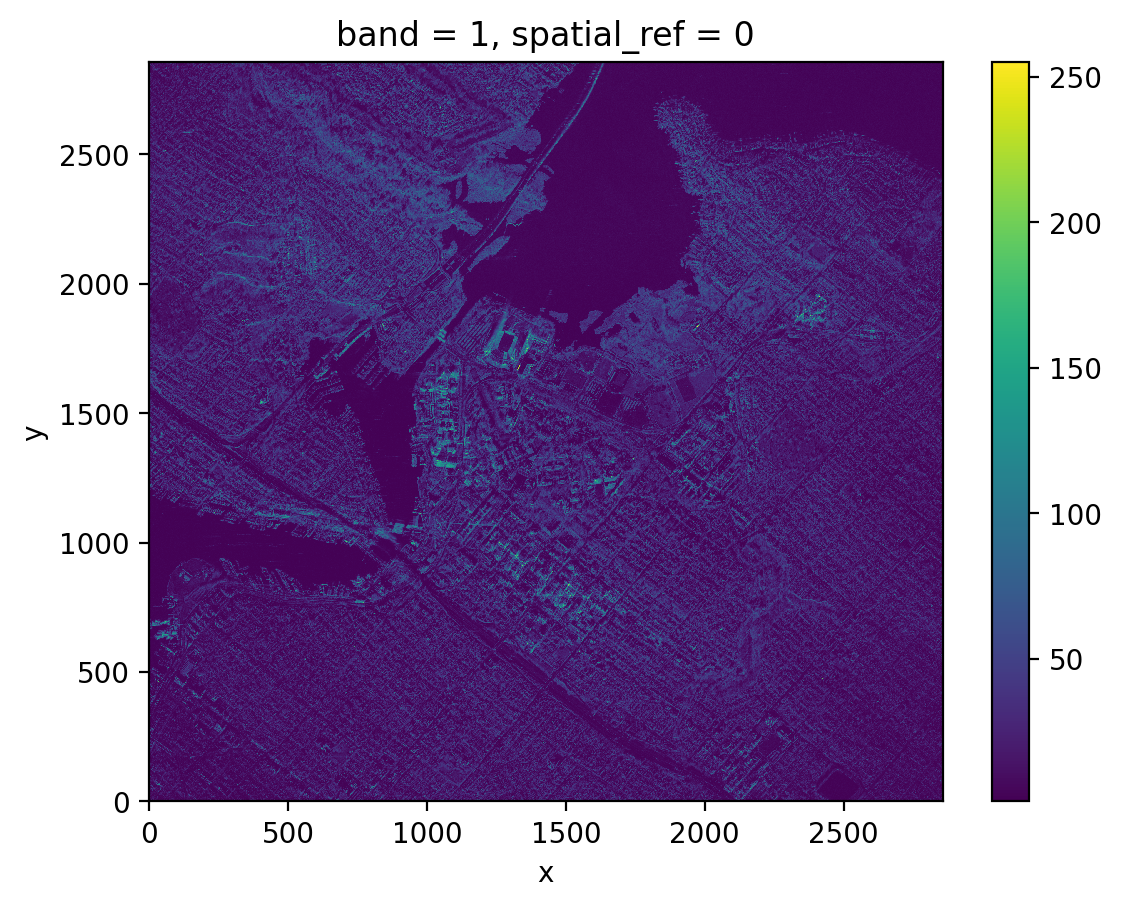

In [29]:
da.plot.imshow()

In [28]:
# "Remove" rotation so that rows are E-W and columns are N-S aligned
# Going through WarpedVRT does this (with 'nearest' resampling by default)
# Not sure how GDAL determines which grid spacing to use...
with rasterio.open(url) as src:
    vrt = rasterio.vrt.WarpedVRT(src, crs='EPSG:4326')
    dar = rioxarray.open_rasterio(vrt,
                                  masked=True,
                                  overview_level=2).squeeze()
dar.rio.transform()

Affine(2.3231049077467925e-05, 0.0, -122.35190870273843,
       0.0, -2.3231049077467925e-05, 47.68695094564203)

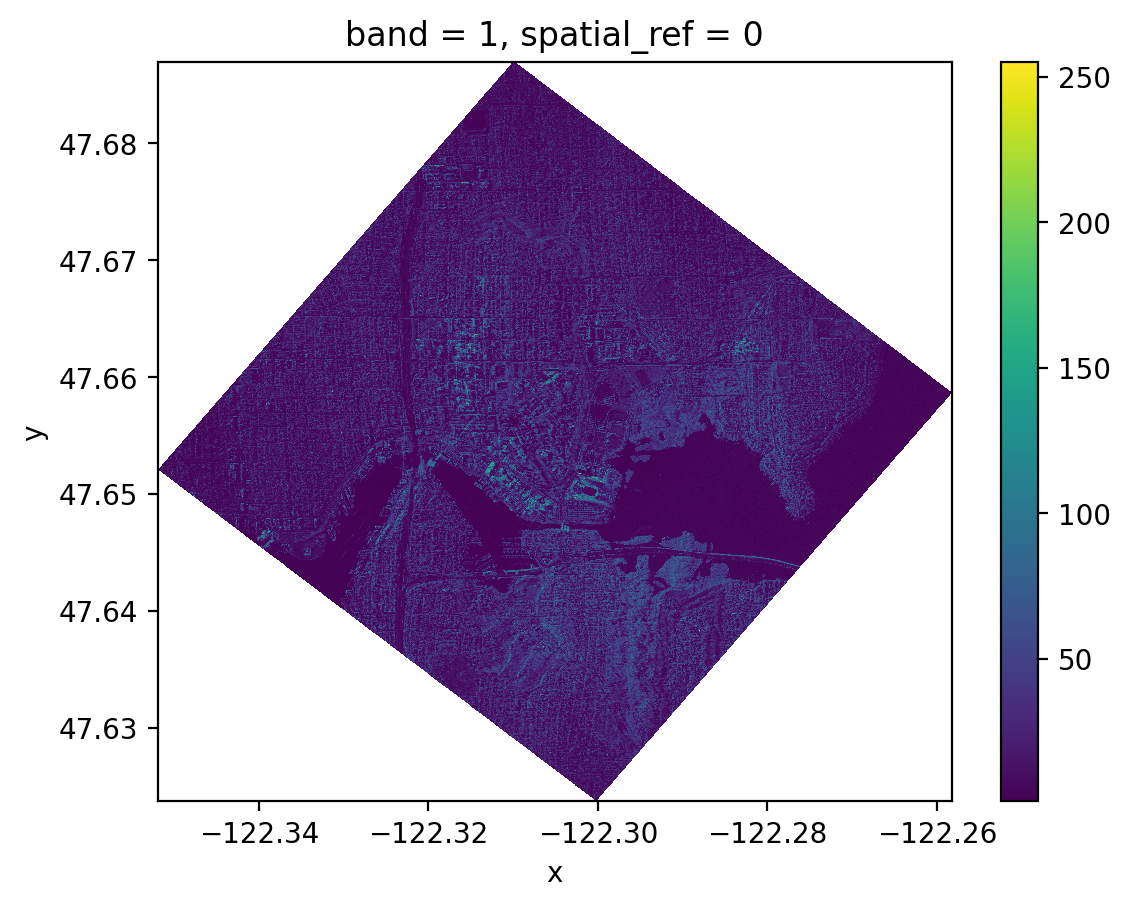

In [30]:
dar.plot.imshow();